In [1]:
import pandas as pd
import numpy as np

file_path = "C:/Users/Mateo/Desktop/UNAD/SEMESTRE II/ANÁLISIS DE DATOS/Tarea 3/Anexo 2 - Dataset Vehicle/car details v4.csv"  
data = pd.read_csv(file_path)

print("Primeras filas del dataset:")
print(data.head())

print("\nInformación del dataset:")
print(data.info())

print("\nValores nulos por columna:")
print(data.isnull().sum())

print("\nResumen estadístico:")
print(data.describe())

print("\nValores únicos por columna categórica:")
for col in ['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain']:
    print(f"{col}: {data[col].unique()}")

Primeras filas del dataset:
            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max T

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

X = data.drop(['Price', 'Model'], axis=1)
y = data['Price']

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("R-cuadrado (R2):", r2)


Error cuadrático medio (MSE): 2381071189408.342
R-cuadrado (R2): 0.6591790705072114


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE) tras escalado:", mse)
print("R-cuadrado (R2) tras escalado:", r2)



Error cuadrático medio (MSE) tras escalado: 6.001153213810476e+36
R-cuadrado (R2) tras escalado: -8.589909556075689e+23


In [34]:
def remove_outliers(df, columns):
    for col in columns:
        lower_bound = df[col].quantile(0.01)
        upper_bound = df[col].quantile(0.99)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

data_no_outliers = remove_outliers(data, ['Price', 'Kilometer', 'Engine', 'Max Power', 'Max Torque'])

X = data_no_outliers.drop(['Price', 'Model'], axis=1)
y = data_no_outliers['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE) tras eliminación de outliers y escalado:", mse)
print("R-cuadrado (R2) tras eliminación de outliers y escalado:", r2)


Error cuadrático medio (MSE) tras eliminación de outliers y escalado: 1.7566413005355343e+37
R-cuadrado (R2) tras eliminación de outliers y escalado: -8.522850611657974e+24


In [32]:
from sklearn.linear_model import RANSACRegressor

X_reduced = data_no_outliers[['Year', 'Kilometer', 'Engine', 'Max Power', 'Seating Capacity', 'Fuel Tank Capacity']]
y = data_no_outliers['Price']

X_scaled = scaler.fit_transform(X_reduced)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ransac = RANSACRegressor(LinearRegression(), random_state=42)
ransac.fit(X_train, y_train)

y_pred = ransac.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE) con RANSAC:", mse)
print("R-cuadrado (R2) con RANSAC:", r2)


Error cuadrático medio (MSE) con RANSAC: 1281910102157.4978
R-cuadrado (R2) con RANSAC: 0.37804443656580433


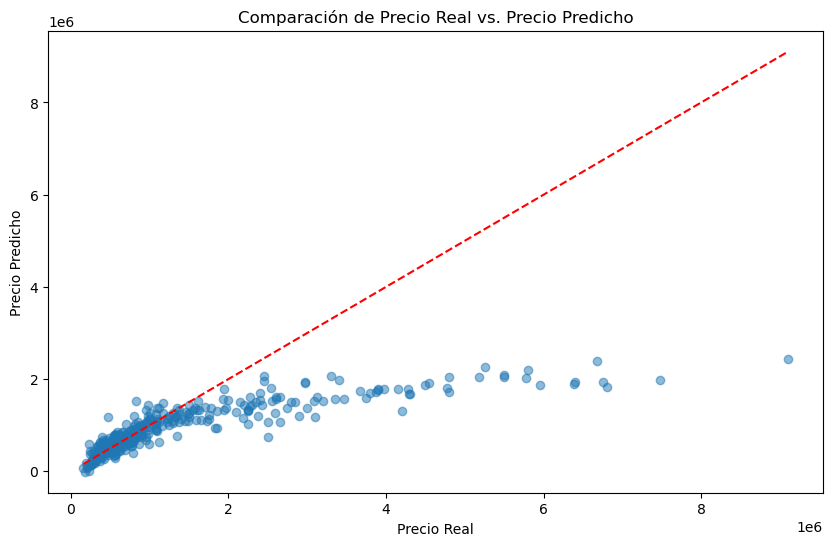

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación de Precio Real vs. Precio Predicho")
plt.show()
